## installing Libraries

In [1]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nirajhamal","key":"04a0219155e1c348747286fbe3535728"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!mkdir caltech_dataset
%cd caltech_dataset

/content/caltech_dataset


In [5]:
!kaggle datasets list -s caltech101

ref                                                       title                                                 size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
athota1/caltech101                                        caltech101                                       275042256  2019-03-16 01:34:05.817000           1188         12  0.1875           
maricinnamon/caltech101-airplanes-motorbikes-schooners    Caltech101 | Airplanes, Motorbikes & Schooners    15236742  2022-09-14 10:10:50.473000            590         11  1.0              
maricinnamon/caltech101-stop-sign-images-annotations      Caltech101 | Stop Sign | Images & Annotations       947624  2022-09-02 18:19:11.627000            533         20  1.0              
imbikramsaha/caltech-101                          

In [6]:
!kaggle datasets download -d athota1/caltech101

Dataset URL: https://www.kaggle.com/datasets/athota1/caltech101
License(s): unknown
 95% 248M/262M [00:00<00:00, 724MB/s] 
100% 262M/262M [00:00<00:00, 781MB/s]


In [7]:
!unzip caltech101.zip -d caltech101

Streaming output truncated to the last 5000 lines.
  inflating: caltech101/101_objectcategories/101_ObjectCategories/ceiling_fan/image_0030.jpg  
  inflating: caltech101/101_objectcategories/101_ObjectCategories/ceiling_fan/image_0031.jpg  
  inflating: caltech101/101_objectcategories/101_ObjectCategories/ceiling_fan/image_0032.jpg  
  inflating: caltech101/101_objectcategories/101_ObjectCategories/ceiling_fan/image_0033.jpg  
  inflating: caltech101/101_objectcategories/101_ObjectCategories/ceiling_fan/image_0034.jpg  
  inflating: caltech101/101_objectcategories/101_ObjectCategories/ceiling_fan/image_0035.jpg  
  inflating: caltech101/101_objectcategories/101_ObjectCategories/ceiling_fan/image_0036.jpg  
  inflating: caltech101/101_objectcategories/101_ObjectCategories/ceiling_fan/image_0037.jpg  
  inflating: caltech101/101_objectcategories/101_ObjectCategories/ceiling_fan/image_0038.jpg  
  inflating: caltech101/101_objectcategories/101_ObjectCategories/ceiling_fan/image_0039.jpg  

In [8]:
!rm -rf caltech101.zip
!rm -rf sample_data

In [9]:
import pandas as pd
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [11]:
# Define transforms
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])


In [13]:
#df = image.load_img('/content/caltech_dataset/caltech101/101_ObjectCategories/Motorbikes/image_0001.jpg')

data_dir = '/content/caltech_dataset/caltech101/101_ObjectCategories'


# Load dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform_train)

# Show classes
class_names = full_dataset.classes
print(f"Total Classes: {len(class_names)}")
print(class_names)

Total Classes: 102
['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_h

In [14]:
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Update val/test transforms
val_dataset.dataset.transform = transform_test
test_dataset.dataset.transform = transform_test

# Data loaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [15]:
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained ResNet-18
model = models.resnet18(pretrained=True)

# Freeze feature extractor if desired (optional)
# for param in model.parameters():
#     param.requires_grad = False

# Replace final layer
num_classes = len(class_names)  # Should be 102
model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 192MB/s]


In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [23]:
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f} Accuracy: {epoch_acc:.2f}%")


Epoch [1/10] Loss: 0.0044 Accuracy: 99.95%
Epoch [2/10] Loss: 0.0059 Accuracy: 99.88%
Epoch [3/10] Loss: 0.0048 Accuracy: 99.91%
Epoch [4/10] Loss: 0.0031 Accuracy: 99.92%
Epoch [5/10] Loss: 0.0028 Accuracy: 99.94%
Epoch [6/10] Loss: 0.0028 Accuracy: 99.92%
Epoch [7/10] Loss: 0.0023 Accuracy: 99.95%
Epoch [8/10] Loss: 0.0020 Accuracy: 99.94%
Epoch [9/10] Loss: 0.0020 Accuracy: 99.94%
Epoch [10/10] Loss: 0.0019 Accuracy: 99.95%


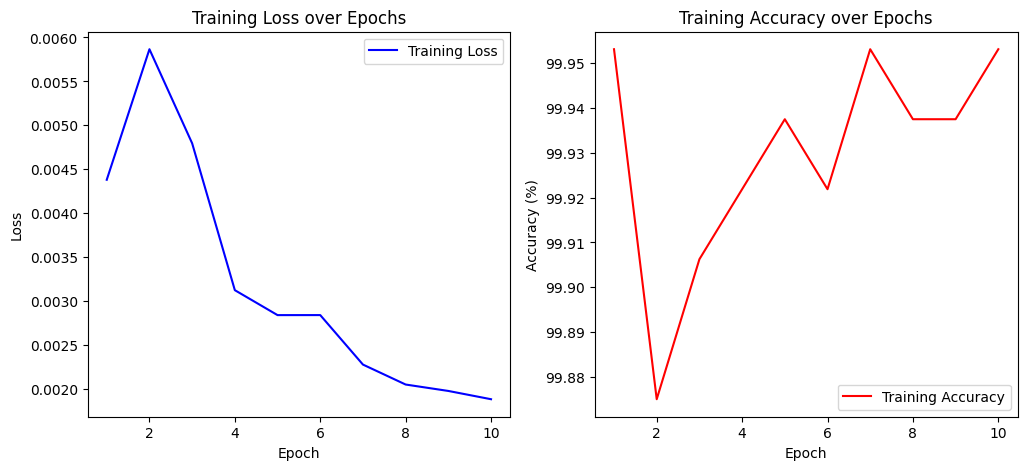

In [24]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'r-', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy over Epochs')
plt.legend()

plt.show()


In [18]:
model.eval()
val_preds, val_labels = [], []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        val_preds.extend(preds.cpu().numpy())
        val_labels.extend(labels.numpy())

print("\nValidation Classification Report:")
print(classification_report(val_labels, val_preds, target_names=class_names))



Validation Classification Report:
                   precision    recall  f1-score   support

BACKGROUND_Google       0.86      0.92      0.88        71
            Faces       1.00      1.00      1.00        72
       Faces_easy       1.00      1.00      1.00        70
         Leopards       1.00      1.00      1.00        23
       Motorbikes       1.00      1.00      1.00       128
        accordion       1.00      1.00      1.00         6
        airplanes       1.00      1.00      1.00       116
           anchor       1.00      0.70      0.82        10
              ant       1.00      0.83      0.91         6
           barrel       1.00      1.00      1.00         6
             bass       1.00      1.00      1.00         4
           beaver       1.00      0.83      0.91         6
        binocular       1.00      1.00      1.00         5
           bonsai       1.00      1.00      1.00        24
            brain       0.93      1.00      0.97        14
     brontosaurus   

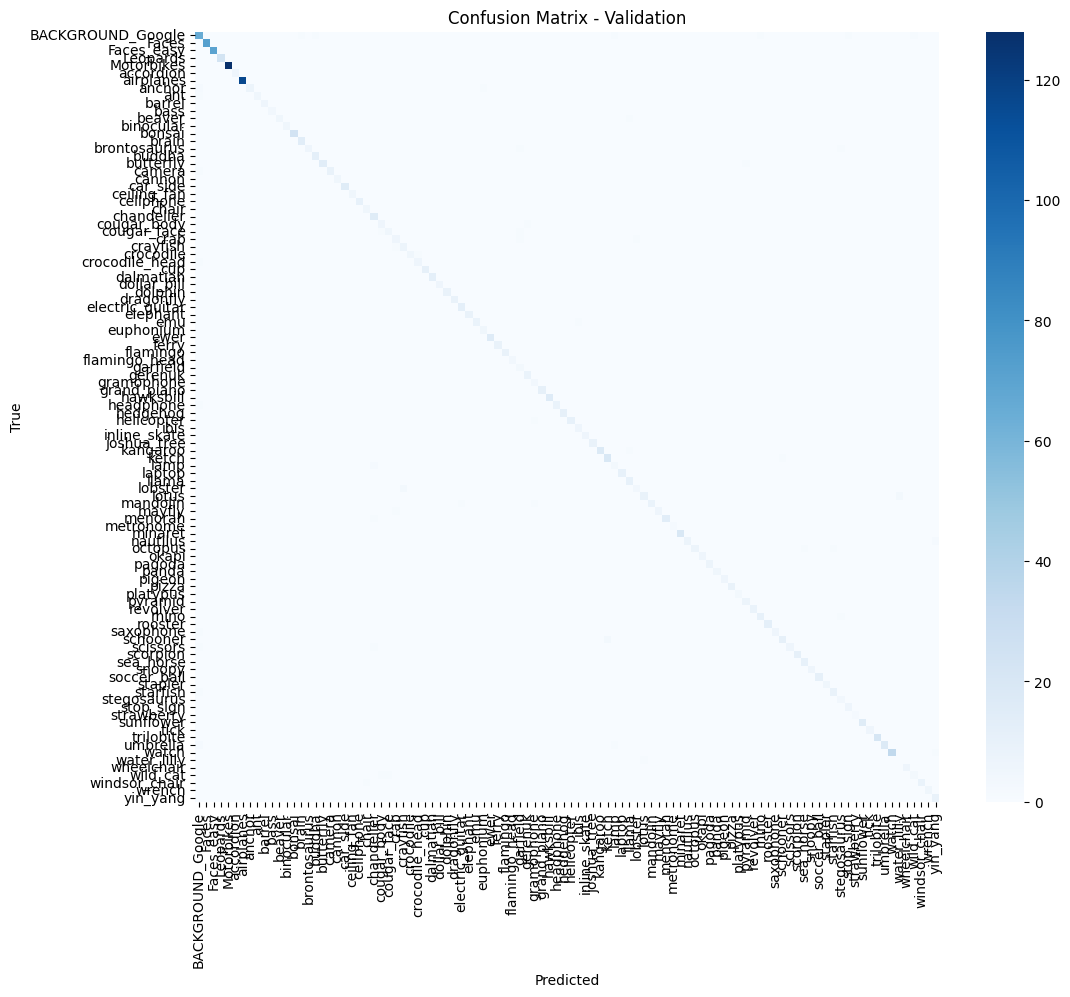

In [19]:
cm = confusion_matrix(val_labels, val_preds)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Validation")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [20]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

test_acc = 100 * correct / total
print(f"\nTest Accuracy: {test_acc:.2f}%")



Test Accuracy: 95.48%


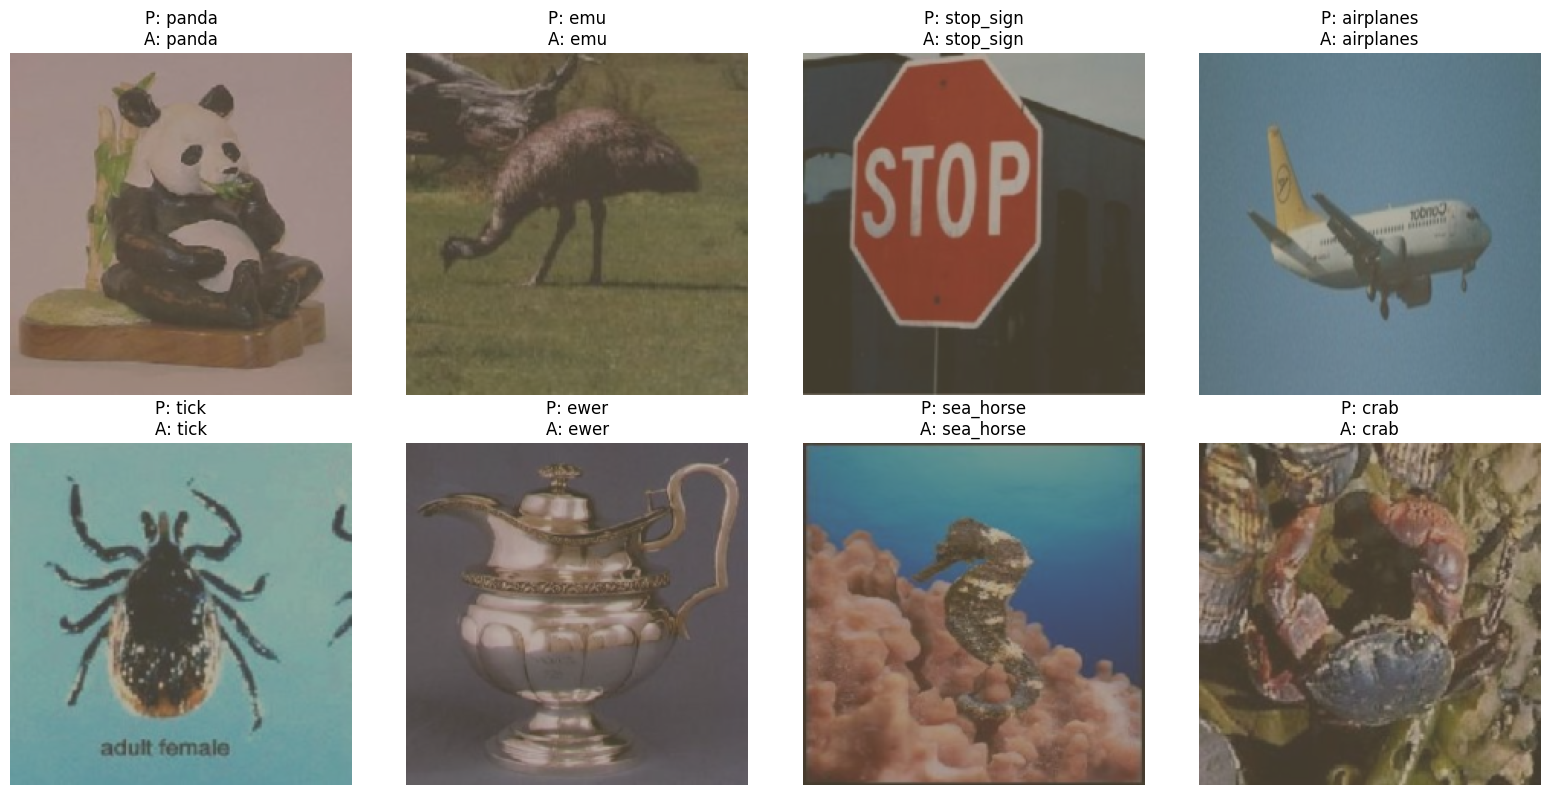

In [21]:
import matplotlib.pyplot as plt
import torchvision

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))  # Convert from Tensor image
    mean = np.array([0.485, 0.456, 0.406])  # ImageNet mean
    std = np.array([0.229, 0.224, 0.225])   # ImageNet std
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.axis('off')

# Display a batch of test images with predictions
def show_predictions(model, loader, class_names, device, num_images=8):
    model.eval()
    images_shown = 0
    plt.figure(figsize=(16, 8))

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for i in range(images.size(0)):
                if images_shown >= num_images:
                    break

                plt.subplot(2, num_images//2, images_shown + 1)
                imshow(images[i].cpu(),
                       title=f"P: {class_names[preds[i]]}\nA: {class_names[labels[i]]}")
                images_shown += 1

            if images_shown >= num_images:
                break
    plt.tight_layout()
    plt.show()

# Call the function to display predictions
show_predictions(model, test_loader, class_names, device)
